# Bay Wheels Data 2019 Data Exploration and Visualization
## by Markus Müller

## Investigation Overview

> The goal of this presentation is identify the differences in user type for the regional public bicycle sharing system Bay Wheels in the San Francisco Bay Area, California. People who use the system can subscribe to it or use it on the fly, so it is interesting so see if the tow groups differ in their usage patterns. The different patterns are analyzed for the year 2019

## Dataset Overview

> The dataset used for this analysis consists of monthly individual trip data from January 2019 to December 2019 and can be downloaded individually per month from here: https://s3.amazonaws.com/baywheels-data/index.html

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
goBike = pd.read_csv('FordGoBike_2019/Ford_Go_Bike_2019_clean.csv')

# make some adjustments that aren't saved in the clean DataFrame
goBike['start_time_day'] = pd.Categorical(goBike['start_time_day'], 
                                          categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                          ordered=True)

goBike['start_time_month'] = pd.Categorical(goBike['start_time_month'],
                                            categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December'],
                                            ordered = True)

In [3]:
# set seaborn style for uniform 
sns.set_style("dark")

## User Types and monthly usage

> It is very clear that the service was mainly used by subscribers in 2019 (80% of the time was a subscriber). The highest usage was in March, April and July. In general, December is the month with the lowest usage. It is interesting to note that customers use the service more often over the year and in December they have almost the same number of trips as subscribers. This is probably due to the fact that the service became more popular over the year and therefore more people used it.

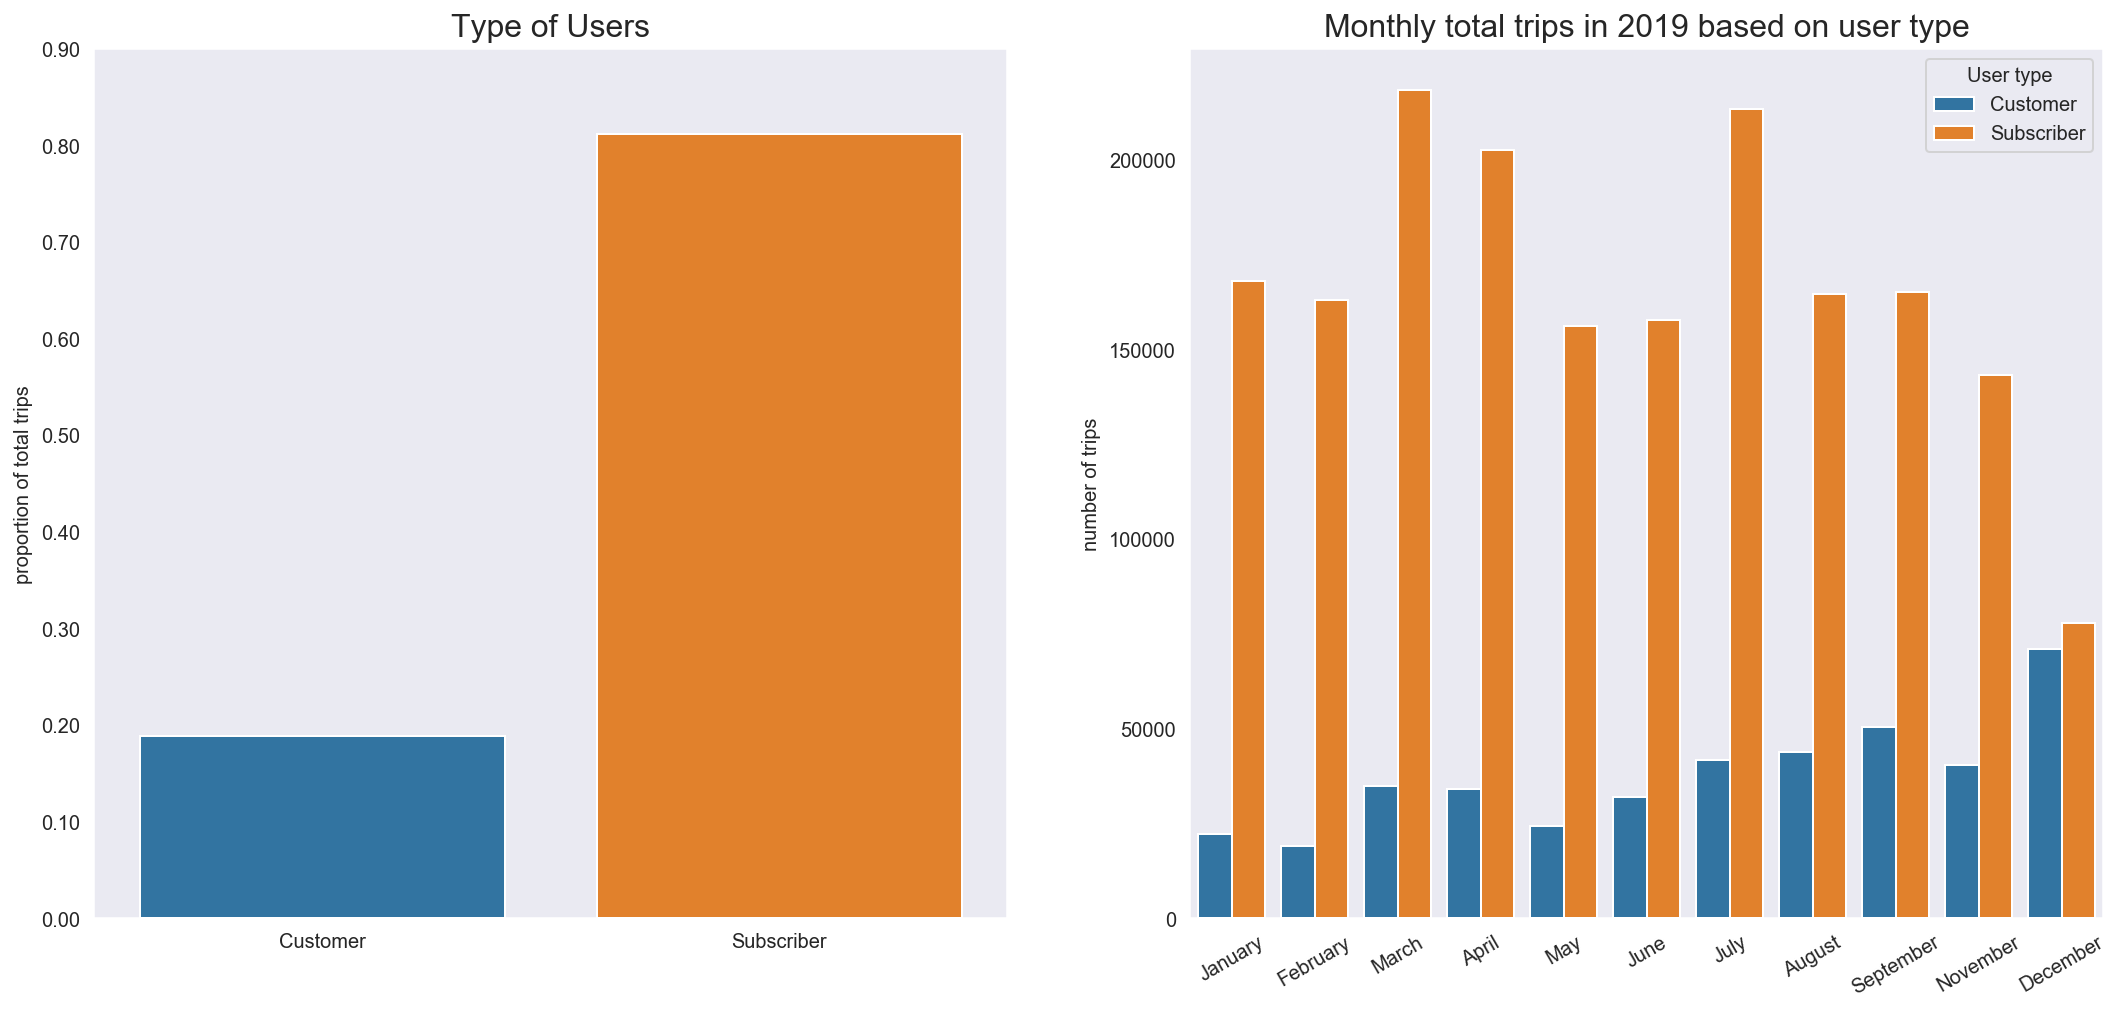

In [4]:
n_points = len(goBike['user_type'])
max_count = len(goBike.query('user_type == "Subscriber"'))
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.1, 0.10)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.subplots(figsize=(18, 8))

plt.subplot(121)
sns.countplot(goBike['user_type'])
plt.title('Type of Users', fontsize = 16)
plt.xlabel('')
plt.ylabel('proportion of total trips')
plt.yticks(tick_props * n_points, tick_names)

plt.subplot(122)
sns.countplot(goBike['start_time_month'], hue=goBike['user_type'])
plt.xticks(rotation= 30)
plt.legend(title = 'User type')
plt.title('Monthly total trips in 2019 based on user type', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

## Compare Customer and Subscriber usage on hour per day and weekday

> The user type influences the use of the bikes with regard to the days of the week. For example, customers use the service throughout the week while the main use for subscribers falls on working days. Subscribers also use the service on weekends but not to the same extent as customers. The bikes are used during the week around 8 a.m. and 5 p.m. and for weekends it is between 10 a.m. and 5 p.m.

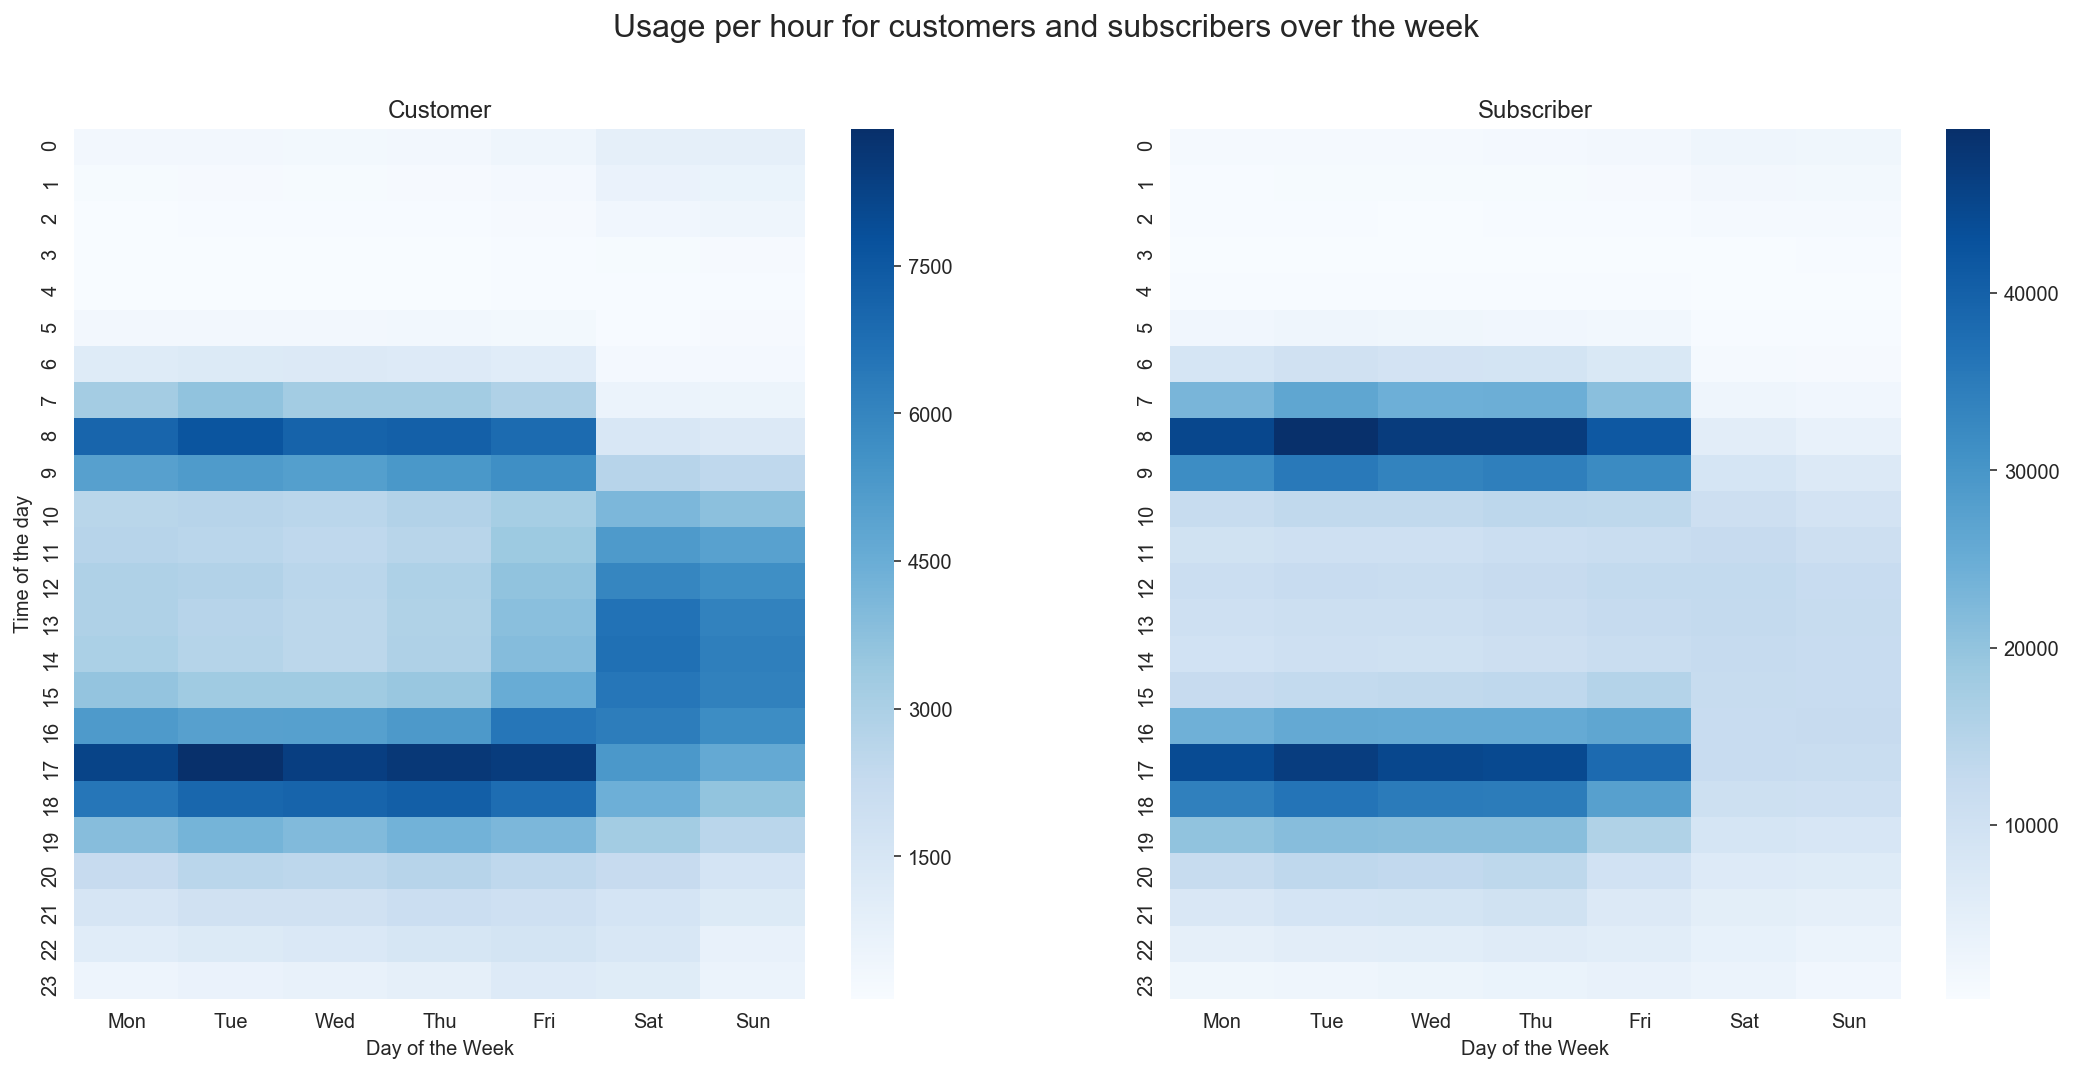

In [5]:
# get the count of bikes for each hour and each day of the week
goBike_customers = goBike.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].count().reset_index()
goBike_subscribers = goBike.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].count().reset_index()

# make pivots to make the data usable for a heatmap
goBike_customers = goBike_customers.pivot('start_time_hour', 'start_time_day', 'bike_id')
goBike_subscribers = goBike_subscribers.pivot('start_time_hour', 'start_time_day', 'bike_id')

# set up subplots
plt.subplots(figsize=(18, 8))
plt.suptitle('Usage per hour for customers and subscribers over the week', fontsize = 16)

# plot heatmap
plt.subplot(121)
sns.heatmap(goBike_customers, cmap = 'Blues')
plt.title('Customer')
plt.xlabel('Day of the Week')
plt.ylabel('Time of the day')

# plot heatmap
plt.subplot(122)
sns.heatmap(goBike_subscribers, cmap = 'Blues')
plt.title('Subscriber')
plt.xlabel('Day of the Week')
plt.ylabel('');

## Total trips per day of week for user type

>  There are more trips on workdays than one weekends (due to subscribers commuting). The decline is much stronger for subscriber than for customers, which is relatively contsant over the wohl week

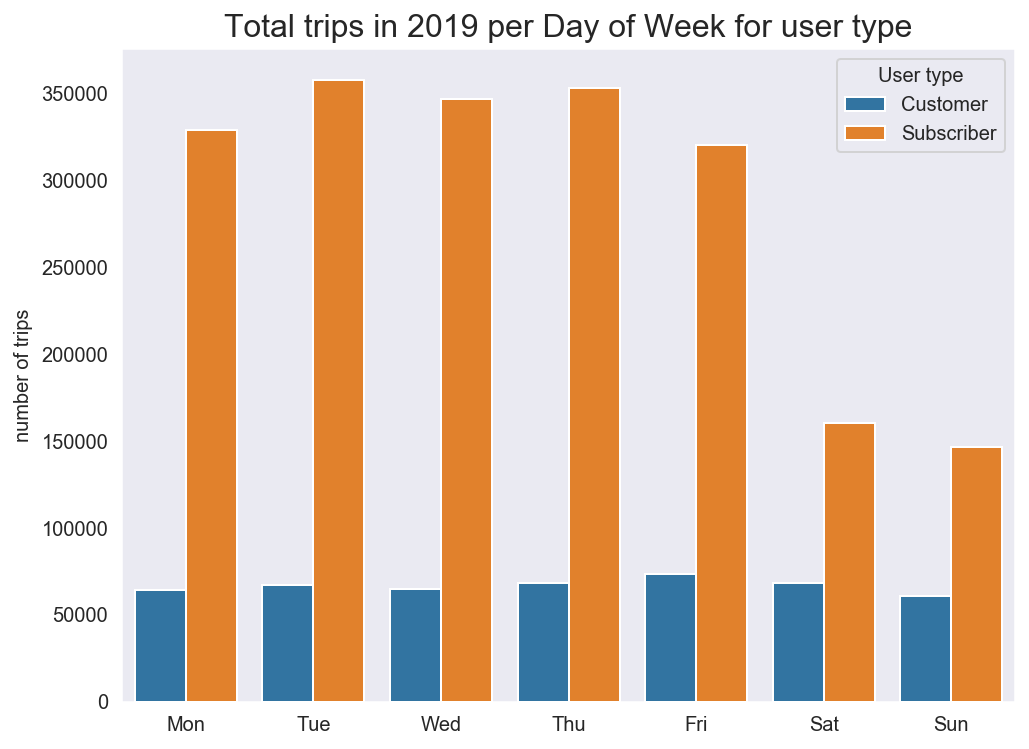

In [6]:
fig = plt.subplots(figsize=(8,6))
sns.countplot(goBike['start_time_day'], hue = goBike['user_type'])
plt.legend(title = 'User type')
plt.title('Total trips in 2019 per Day of Week for user type', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

## Average Duration for different user type realted to weekdays

> The average time on the bike is also influenced by the user type. Generally, customers use the bike for 16 minutes, while subscribers use the bike for 11 minutes. In addition, the distribution for subscribers is flatter and wider, which means that the usage is more similar over time, while the distribution for customers is more variable. This becomes clear when looking at the duration over the days of the week. The duration for subscribers is almost identical over the working days, while the duration for customers varies from day to day. In general, the duration increases on weekends, but it increases to a greater extent for customers.

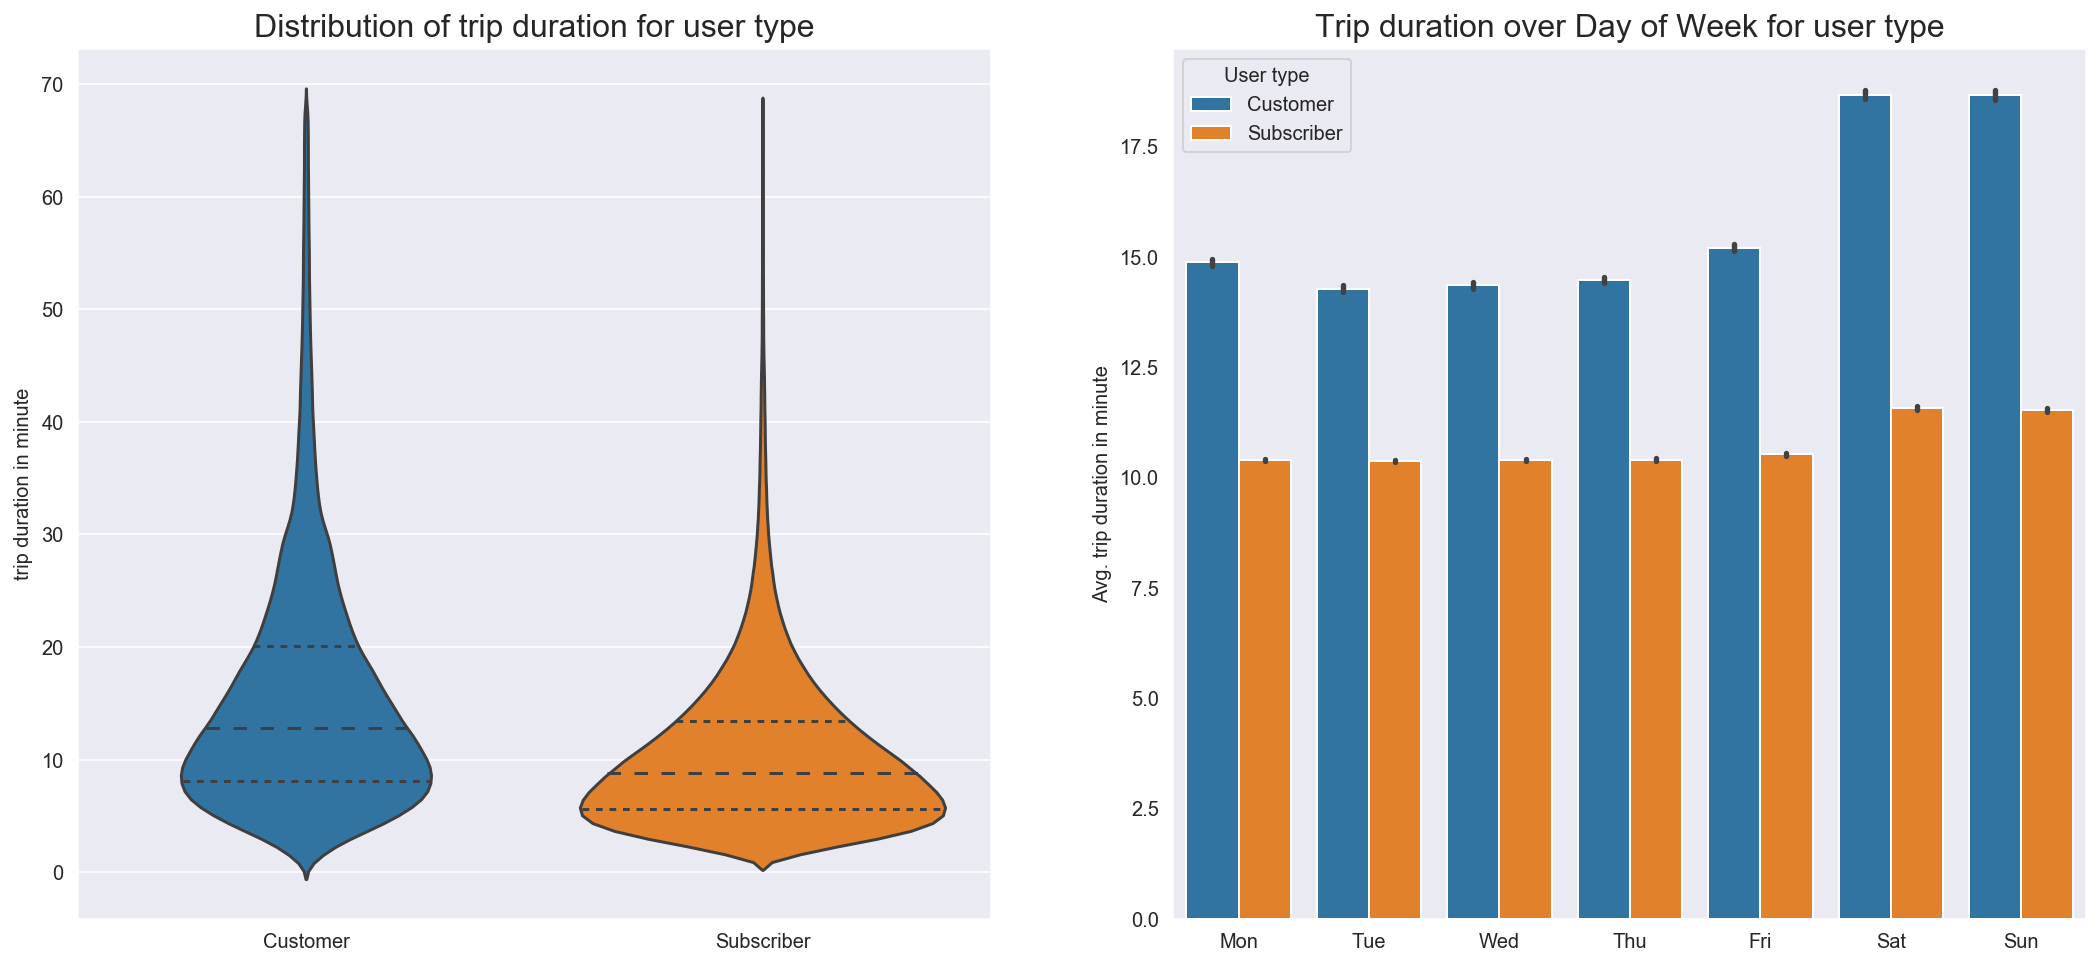

In [7]:
plt.subplots(figsize=(18, 8))

plt.subplot(121)
sns.violinplot(x='user_type', y='duration_min', data = goBike, inner = 'quartile')
plt.gca().yaxis.grid(True) # set grid lines to enhance interpretability
plt.xlabel('')
plt.ylabel('trip duration in minute')
plt.title('Distribution of trip duration for user type', fontsize = 16);

plt.subplot(122)
sns.barplot(x = 'start_time_day', y = 'duration_min', hue = 'user_type', data = goBike)
plt.xlabel('')
plt.ylabel('Avg. trip duration in minute')
plt.title('Trip duration over Day of Week for user type', fontsize = 16)
plt.legend(title = 'User type');

## Summary
> The bike rental system gets a lot more usage from subscribers than from customers (over th eyear 80% of the time a subscriber rented a bike), this is most likely due to the reason that the service is used by people who are commuting to work and therefore subscribe to the service to enhance ease of use. It becomes obvious, when looking at the different usage patterns across the week. Customers use the service every day, whereas subscribers use it most frequently on workdays at 8 a.m. and 5 p.m., which are the busiest  hours in the day for both user types. In general people use the service more on workdays than on weekends. But this is due to the fact that subscribers are outnumbering customers. For Customers the usage is the almost same on weekends and workdays, but the time spend on a bike is higher on weekends than on workdays. This is also true for subscribers but not in the same ratio, which is higher for customers.

>The average duration on the bike is for Customers  5 minutes longer than for Subscribers which have an average duration of 11 minutes. Regarding the usage duration, subscribers are driving the same amount every workday, whereas for customers the duration varies from workday to workday and increase on the weekend.
